In [4]:
import numpy as np
import rescomp

import matplotlib.pyplot as plt

In [5]:
tau = 1000
T = 2
N = 1000
dt = 0.1

tau_timesteps = int(tau/dt)
T_timesteps = int(T/dt)

total_time_steps = tau_timesteps + N*T_timesteps

print(f"{tau_timesteps}: tau_timesteps")
print(f"{T_timesteps}: T_timesteps")
print(f"{total_time_steps}: total_time_steps")

10000: tau_timesteps
20: T_timesteps
30000: total_time_steps


In [6]:
dimensions = 64
system_size = 35
eps = 1e-6
m = 10

sim_data = rescomp.simulate_trajectory(
            sys_flag='kuramoto_sivashinsky', dimensions=dimensions, system_size=system_size, dt=dt,
            time_steps=total_time_steps, eps = 0.0)

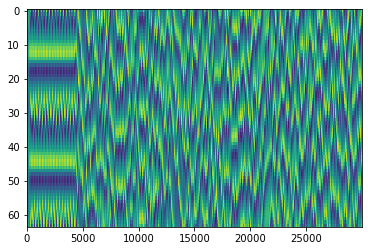

In [67]:
plt.imshow(sim_data.T, aspect = "auto")

In [7]:
def data_creation_function(time_steps, dt, starting_point):
    sim_data = rescomp.simulate_trajectory(
            sys_flag='kuramoto_sivashinsky', dimensions=dimensions, system_size=system_size, dt=dt,
            time_steps=time_steps, starting_point = starting_point)
    return sim_data

def get_lypunov_exponents(data_creation_function, tau, T, N, dt, eps, m):
    tau_timesteps = int(tau/dt)
    T_timesteps = int(T/dt)
    
    initial_condition = data_creation_function(tau, dt, starting_point = None)[-1] # discard transient states
    state_dim = initial_condition.size
    if m>state_dim:
        print("ERROR: m > state_dim")
        return
    # choose initial orthogonal directions:
    Q = np.eye(m, state_dim)
    
    # Space to save u_js:
    U = np.zeros((N+1, state_dim))
    U[0, :] = initial_condition
    
    PsiQ = np.zeros(Q.shape)
    
    R_diags = np.zeros((N, m))
    
    for j in range(1, N+1): # for all time intervals
        u_jm1 = U[j-1, :]
        u_j = data_creation_function(T, dt, starting_point = u_jm1)[-1]
        U[j, :] = u_j
        for i in range(m): # for all dimensions
            q_i = Q[i, :] # the (j-1)th Q
#             print("qi: ", q_i)
            u_jm1_per = u_jm1 + eps*q_i
            w_i_j = data_creation_function(T, dt, starting_point = u_jm1_per)[-1]
            PsiQ[i, :] = (w_i_j - u_j)/eps # approximation of Psi(t_j, t_jm1)q_i(j_m1)
        Q, R = np.linalg.qr(PsiQ.T) # the new Q (the jth)
        Q = Q.T
        print("R_shape: ", R.shape)
        print("Q_shape: ", Q.shape)
        for i in range(m):
            R_diags[j-1, i] = R[i, i]
    print("R_diags: ", R_diags)
    return R_diags
    lyapunov_exp = np.sum(np.log(R_diags)/(N*T), axis = 0)
    return lyapunov_exp

In [72]:
R_diags = get_lypunov_exponents(data_creation_function, tau, T, N, dt, eps, m)

R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (1

R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (1

R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (1

R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (10, 10)
Q_shape:  (10, 64)
R_shape:  (1

KeyboardInterrupt: 

1.1733157979390973

(10,)
[nan nan nan nan nan nan nan nan nan nan]


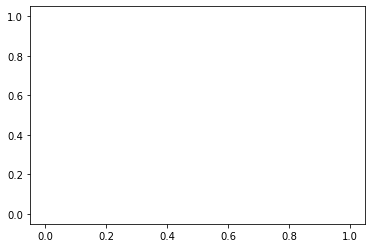

In [55]:
print(lyapunov_exp.shape)
plt.plot(lyapunov_exp)
print(lyapunov_exp)

# Lorenz System:

In [2]:
def variation_of_model(dt, eps = 0.0):

    model = lambda x: rescomp.simulations._normal_lorenz(x, sigma=a, rho=b*(1+eps), beta=c)
    model_pred = lambda x: rescomp.simulations._runge_kutta(model, dt, x)

    return model_pred

In [46]:
# def data_creation_function(time_steps, dt, starting_point):
#     sim_data = rescomp.simulate_trajectory(
#             sys_flag='kuramoto_sivashinsky', dimensions=dimensions, system_size=system_size, dt=dt,
#             time_steps=time_steps, starting_point = starting_point)
#     return sim_data

# Lorenz
def data_creation_function(time_steps, dt, starting_point=None):
    return  rescomp.simulate_trajectory(
            sys_flag='lorenz', dt=dt, time_steps=time_steps,
            starting_point=starting_point)

def get_lypunov_exponents(data_creation_function, tau, T, N, dt, eps, m):
    tau_timesteps = int(tau/dt)
    T_timesteps = int(T/dt)
    
    initial_condition = data_creation_function(tau_timesteps, dt, starting_point=None)[-1] # discard transient states
    state_dim = initial_condition.size
    if m>state_dim:
        print("ERROR: m > state_dim")
        return
    # choose initial orthogonal directions:
    Q = np.eye(m, state_dim)
    print("Q: ", Q)
    
    # Space to save u_js:
    U = np.zeros((N+1, state_dim))
    U[0, :] = initial_condition
    
    # PsiQ = np.zeros(Q.shape)
    Psiq = np.zeros((N, m, state_dim))
    
    R_diags = np.zeros((N, m))
    
    for j in range(1, N+1): # for all time intervals
        u_jm1 = U[j-1, :]
        u_j = data_creation_function(T_timesteps, dt, starting_point = u_jm1)[-1]
        U[j, :] = u_j
        for i in range(m): # for all dimensions
            q_i = Q[i, :] # the (j-1)th Q
#             print("qi: ", q_i)
            u_jm1_per = u_jm1 + eps*q_i
            w_i_j = data_creation_function(T_timesteps, dt, starting_point = u_jm1_per)[-1]
            Psiq[j-1, i, :] = (w_i_j - u_j)/eps
            # PsiQ[i, :] = (w_i_j - u_j)/eps # approximation of Psi(t_j, t_jm1)q_i(j_m1)
        
        PsiQ = Psiq[j-1, :, :]
        Q, R = np.linalg.qr(PsiQ.T) # the new Q (the jth)
        Q = Q.T
        #print("R_shape: ", R.shape)
        #print("R: ", R)
        #print("Q: ", Q)
        for i in range(m):
            R_diags[j-1, i] = R[i, i].copy()
    #print("R_diags: ", R_diags)
    # return R_diags
    lyapunov_exp = np.sum(np.log(np.abs(R_diags))/(N*T), axis = 0)
    return lyapunov_exp

In [47]:
# dt=0.1
# eps=0.0

# predictor = variation_of_model(dt=dt, eps=eps)

In [49]:
get_lypunov_exponents(data_creation_function, tau=10, T=1, N=10000, dt=0.01, eps=1e-6, m=3)

Q:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


array([ 8.95365614e-01,  9.57447480e-04, -1.41366751e+01])

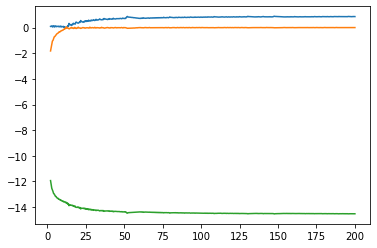

In [55]:
import numpy as np
import scipy

sigma = 10
r = 28
b = 8/3

def diff_Lorenz(u):
    x,y,z = u
    f = [sigma * (y - x), r * x - y - x * z, x * y - b * z]
    Df = [[-sigma, sigma, 0], [r - z, -1, -x], [y, x, -b]]
    return np.array(f), np.array(Df)

def LEC_system(u):
    #x,y,z = u[:3]             # n=3
    U = u[3:12].reshape([3,3]) # size n square matrix, sub-array from n to n+n*n=n*(n+1)
    L = u[12:15]               # vector, sub-array from n*(n+1) to n*(n+1)+n=n*(n+2)
    f,Df = diff_Lorenz(u[:3])
    A = U.T.dot(Df.dot(U))
    dL = np.diag(A).copy();
    for i in range(3):
        A[i,i] = 0
        for j in range(i+1,3): A[i,j] = -A[j,i]
    dU = U.dot(A)
    return np.concatenate([f,dU.flatten(),dL])

u0 = np.ones(3)
U0 = np.identity(3)
L0 = np.zeros(3)
u0 = np.concatenate([u0, U0.flatten(), L0])
t = np.linspace(0,200,501)
u = scipy.integrate.odeint(lambda u,t:LEC_system(u),u0,t, hmax=0.05)
L = u[5:,12:15].T/t[5:]

plt.plot(t[5:],L.T)

In [8]:
# own test:

def data_creation_function(time_steps, dt, starting_point=None):
    return  rescomp.simulate_trajectory(
            sys_flag='lorenz', dt=dt, time_steps=time_steps,
            starting_point=starting_point)


# starting_point = np.array([-14.03020521, -20.88693127, 25.53545])

dt = 1e-5
remove_transient = 100
time_steps = 10000

starting_point = data_creation_function(remove_transient, dt, starting_point=starting_point)[-1]

delta = np.array([1e-5, 1e-5, 1e-5])
starting_point2 = starting_point + delta

traj1 = data_creation_function(time_steps, dt, starting_point=starting_point)
traj2 = data_creation_function(time_steps, dt, starting_point=starting_point2)

error = np.linalg.norm(traj2-traj1, axis=1)
error.shape

NameError: name 'starting_point' is not defined

In [9]:
# own test:

def data_creation_function(time_steps, dt, starting_point=None):
    return  rescomp.simulate_trajectory(
            sys_flag='lorenz', dt=dt, time_steps=time_steps,
            starting_point=starting_point)


# starting_point = np.array([-14.03020521, -20.88693127, 25.53545])

dt = 1e-5
remove_transient = 100
time_steps = 10000

starting_point = starting_point = np.array([500, 500, 500])

delta = np.array([1e-5, 1e-5, 1e-5])
starting_point2 = starting_point + delta

traj1 = data_creation_function(time_steps, dt, starting_point=starting_point)
traj2 = data_creation_function(time_steps, dt, starting_point=starting_point2)

error2 = np.linalg.norm(traj2-traj1, axis=1)
error2.shape

(10000,)

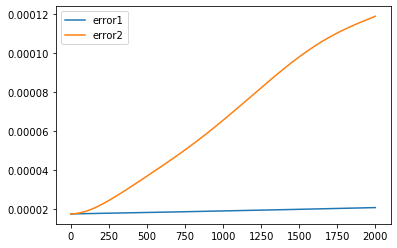

In [124]:
to_show = 2000
# plt.plot(np.log(error[:to_show]))
plt.plot(error[:to_show], label="error1")
plt.plot(error2[:to_show], label="error2")
# plt.yscale("log")
plt.legend()

In [113]:
error2==error

array([ True, False, False, ..., False, False, False])

In [135]:
def get_lypunov_exponents_2(data_creation_function, tau, T, N, dt, eps, m):
    tau_timesteps = int(tau/dt)
    T_timesteps = int(T/dt)
    
    initial_condition = data_creation_function(tau_timesteps, dt, starting_point=None)[-1] # discard transient states
    state_dim = initial_condition.size
    if m>state_dim:
        print("ERROR: m > state_dim")
        return
    # choose initial orthogonal directions:
    Q = np.eye(m, state_dim)
    print("Q: ", Q)
    
    # Space to save u_js:
    U = np.zeros((N+1, state_dim))
    U[0, :] = initial_condition
    
    PsiQ = np.zeros(Q.shape)
    # Psiq = np.zeros((N, m, state_dim))
    
    R_diags = np.zeros((N, m))
    
    for j in range(1, N+1): # for all time intervals
        u_jm1 = U[j-1, :]
        u_j = data_creation_function(T_timesteps, dt, starting_point = u_jm1)[-1]
        U[j, :] = u_j
        for i in range(m): # for all dimensions
            q_i = Q[i, :] # the (j-1)th Q
#             print("qi: ", q_i)
            u_jm1_per = u_jm1 + eps*q_i
            w_i_j = data_creation_function(T_timesteps, dt, starting_point = u_jm1_per)[-1]
            # Psiq[j-1, i, :] = (w_i_j - u_j)/eps
            PsiQ[i, :] = (w_i_j - u_j)/eps # approximation of Psi(t_j, t_jm1)q_i(j_m1)
        
        # PsiQ = Psiq[j-1, :, :]
        Q, R = np.linalg.qr(PsiQ) # the new Q (the jth)
        # Q = Q.T
        print("R_shape: ", R.shape)
        print("Q_shape: ", Q.shape)
        print("R: ", R)
        print("Q: ", Q)
        for i in range(m):
            R_diags[j-1, i] = R[i, i].copy()
    #print("R_diags: ", R_diags)
    # return R_diags
    lyapunov_exp = np.sum(np.log(np.abs(R_diags))/(N*T), axis = 0)
    return lyapunov_exp

In [136]:
get_lypunov_exponents_2(data_creation_function, tau=10, T=1, N=10000, dt=0.01, eps=1e-6, m=2)

Q:  [[1. 0. 0.]
 [0. 1. 0.]]
R_shape:  (2, 3)
Q_shape:  (2, 2)
R:  [[-2.39790097  0.52204755 -8.61478756]
 [ 0.          0.11105682 -0.16603396]]
Q:  [[-0.5815774  -0.81349107]
 [-0.81349107  0.5815774 ]]


In [138]:
A = scipy.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]])
print(A)
print(A[0])

[[ 12 -51   4]
 [  6 167 -68]
 [ -4  24 -41]]
[ 12 -51   4]


In [139]:
Q, R = np.linalg.qr(A)
print(Q)
print(R)

[[-0.85714286  0.39428571  0.33142857]
 [-0.42857143 -0.90285714 -0.03428571]
 [ 0.28571429 -0.17142857  0.94285714]]
[[ -14.  -21.   14.]
 [   0. -175.   70.]
 [   0.    0.  -35.]]


In [145]:
D = np.diag(np.sign(np.diag(R)))
D
Q_new = Q.dot(D)
R_new = D.dot(R)

print(Q_new)
print(R_new)

print(Q_new.dot(R_new))
# Q.dot(R)

[[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]
[[ 14.  21. -14.]
 [  0. 175. -70.]
 [  0.   0.  35.]]
[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]


In [10]:
def get_lypunov_exponents(data_creation_function, tau, T, N, dt, eps, m, iteration_process=False):
    tau_timesteps = int(tau/dt)
    T_timesteps = int(T/dt)
    
    initial_condition = data_creation_function(tau_timesteps, dt, starting_point=None)[-1] # discard transient states
    state_dim = initial_condition.size
    if m>state_dim:
        print("ERROR: m > state_dim")
        return
    # choose initial orthogonal directions:
    Q = np.eye(m, state_dim)
    print("Q: ", Q)
    
    # Space to save u_js:
    U = np.zeros((N+1, state_dim))
    U[0, :] = initial_condition
    
    PsiQ = np.zeros(Q.shape)
    
    R_diags = np.zeros((N, m))
    
    for j in range(1, N+1): # for all time intervals
        u_jm1 = U[j-1, :]
        u_j = data_creation_function(T_timesteps, dt, starting_point = u_jm1)[-1]
        U[j, :] = u_j
        for i in range(m): # for all dimensions
            q_i = Q[i, :] # the (j-1)th Q
#             print("qi: ", q_i)
            u_jm1_per = u_jm1 + eps*q_i
            w_i_j = data_creation_function(T_timesteps, dt, starting_point = u_jm1_per)[-1]
            PsiQ[i, :] = (w_i_j - u_j)/eps # approximation of Psi(t_j, t_jm1)q_i(j_m1)
        
        Q, R = np.linalg.qr(PsiQ.T) # the new Q (the jth)
        d = np.diag(np.sign(np.diag(R)))
        Q = Q.dot(d)
        R = d.dot(R)
        Q = Q.T
        #print("R_shape: ", R.shape)
        #print("R: ", R)
        #print("Q: ", Q)
        for i in range(m):
            R_diags[j-1, i] = R[i, i].copy()

    if iteration_process:
        return np.cumsum(np.log(np.abs(R_diags))/(N*T), axis = 0)
    
    lyapunov_exp = np.sum(np.log(np.abs(R_diags))/(N*T), axis = 0)
    return lyapunov_exp

def get_lypunov_exponents2(data_creation_function, tau, T, N, dt, eps, m, iteration_process=False):
    tau_timesteps = int(tau/dt)
    T_timesteps = int(T/dt)
    
    initial_condition = data_creation_function(tau_timesteps, dt, starting_point=None)[-1] # discard transient states
    state_dim = initial_condition.size
    if m>state_dim:
        print("ERROR: m > state_dim")
        return
    # choose initial orthogonal directions:
    Q = np.eye(m, state_dim)
    print("Q: ", Q)
    
    # Space to save u_js:
    U = np.zeros((N+1, state_dim))
    U[0, :] = initial_condition
    
    PsiQ = np.zeros(Q.shape)
    
    R_diags = np.zeros((N, m))
    
    for j in range(1, N+1): # for all time intervals
        u_jm1 = U[j-1, :]
        u_j = data_creation_function(T_timesteps, dt, starting_point = u_jm1)[-1]
        U[j, :] = u_j
        for i in range(m): # for all dimensions
            q_i = Q[i, :] # the (j-1)th Q
#             print("qi: ", q_i)
            u_jm1_per = u_jm1 + eps*q_i
            w_i_j = data_creation_function(T_timesteps, dt, starting_point = u_jm1_per)[-1]
            PsiQ[i, :] = (w_i_j - u_j)/eps # approximation of Psi(t_j, t_jm1)q_i(j_m1)
        
        Q, R = np.linalg.qr(PsiQ.T) # the new Q (the jth)
        d = np.diag(np.sign(np.diag(R)))
        # Q = Q.dot(d)
        #  R = d.dot(R)
        Q = Q.T
        #print("R_shape: ", R.shape)
        #print("R: ", R)
        #print("Q: ", Q)
        for i in range(m):
            R_diags[j-1, i] = np.abs(R[i, i]).copy()

    if iteration_process:
        return np.cumsum(np.log(np.abs(R_diags))/(N*T), axis = 0)
    
    lyapunov_exp = np.sum(np.log(np.abs(R_diags))/(N*T), axis = 0)
    return lyapunov_exp

In [12]:
iterations = get_lypunov_exponents(data_creation_function, tau=5, T=0.1, N=100, dt=0.01, eps=1e-6, m=3, iteration_process=True)

Q:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


[  0.61847226  -0.01749761 -12.90089069]


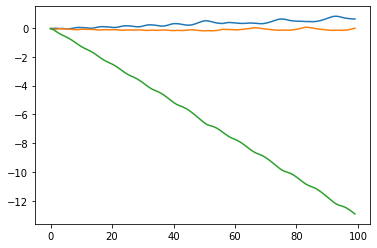

In [13]:
plt.plot(iterations)
print(iterations[-1])

In [14]:
iterations = get_lypunov_exponents2(data_creation_function, tau=5, T=0.1, N=100, dt=0.01, eps=1e-6, m=3, iteration_process=True)

Q:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


[  0.61847267  -0.01749805 -12.90089073]


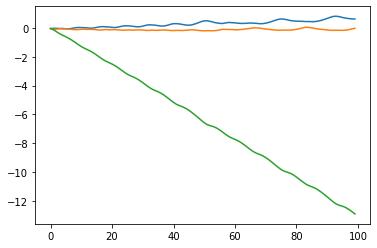

In [15]:
plt.plot(iterations)
print(iterations[-1])